In [1]:
# Installing Needed Packages

import csv
import pandas as pd
import matplotlib.pyplot as plt 
import math

In [2]:
# Cleaning the Data :)

MaternalFile = open('LMF_1_2_Maternal_Employment_Num.csv')
MaternalEmpNum = pd.read_csv(MaternalFile, skiprows=2, na_values = '-')

#Looking for U.S. data only
startIndex = 0
endIndex = 0
for index, row in MaternalEmpNum.iterrows():
    rows = row.tolist()
    if rows[0] == 'United States' :
        startIndex = index
        endIndex = index + 5
        break

#Convert pandas dataframe to list
selectedRows = MaternalEmpNum.iloc[startIndex : endIndex]
selectedRowsLists = selectedRows.values.tolist()

#Remove dots and unknown information (nans) from data
for i in range(len(selectedRowsLists)) :
    rowLength = len(selectedRowsLists[i])
    j = 0
    while j < rowLength:
        if type(selectedRowsLists[i][j]) == float and math.isnan(selectedRowsLists[i][j]):
            del selectedRowsLists[i][j]
            j = j-1
            rowLength = rowLength - 1
        if selectedRowsLists[i][j] == '..':
            del selectedRowsLists[i][j]
            j = j-1
            rowLength = rowLength - 1
        j = j + 1

# Remove 'United States' and '1'
del selectedRowsLists[0][0]
del selectedRowsLists[0][0]

startingYear = 2003

print(selectedRowsLists)

[['No children aged 0-17', '75.9', '76.2', '76.2', '76.4', '76.2', '75.8', '73.4', '73.1', '72.5', '72.4', '72.8', '73.4', '74.1', '74.4', '75.0', '76.1', '76.8', '72.5', '73.7'], ['At least one child aged 0-17', '68.6', '68.4', '68.6', '69.1', '69.6', '69.3', '67.2', '66.2', '65.8', '66.5', '66.5', '67.1', '67.4', '68.4', '69.2', '70.2', '71.1', '67.0', '68.0'], ['One child aged 0-17', '74.5', '73.9', '73.6', '74.5', '75.3', '74.7', '72.8', '71.5', '71.1', '72.0', '71.5', '72.2', '72.4', '73.5', '73.6', '74.6', '75.3', '71.5', '73.3'], ['Two children aged 0-17', '68.9', '68.8', '69.1', '69.6', '70.3', '70.0', '68.0', '67.4', '66.4', '67.0', '67.2', '67.7', '68.2', '69.5', '70.6', '71.4', '72.3', '68.1', '68.8'], ['Three or more children aged 0-17', '56.8', '57.5', '58.3', '58.2', '57.7', '58.4', '55.4', '54.4', '54.7', '55.1', '55.6', '56.3', '56.8', '57.1', '58.5', '59.9', '61.0', '56.3', '56.6']]


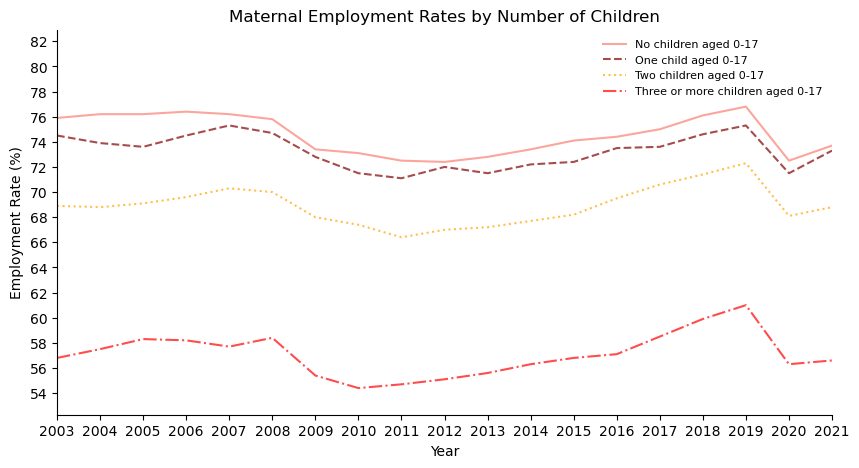

In [3]:
# Create Timeseries Plot

# Create plot and plot size
fig, ax = plt.subplots(figsize=(10,5))

# Plotting and Styling Data 
years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
for row in selectedRowsLists:
    legend_title = row[0]
    if legend_title == 'At least one child aged 0-17' :
        continue
    line_data = [float(x) for x in row[1:]]
    if legend_title == 'No children aged 0-17' :
        ax.plot(years, line_data, 
                color='salmon',
                alpha = 0.7,
                linestyle = '-',
                label=legend_title)
    if legend_title == 'One child aged 0-17' :
        ax.plot(years, line_data, 
                color='maroon',
                alpha = 0.7,
                linestyle = '--',
                label=legend_title)
    if legend_title == 'Two children aged 0-17' :
        ax.plot(years, line_data, 
                color='orange',
                alpha = 0.7,
                linestyle = ':',
                label=legend_title)
    if legend_title == 'Three or more children aged 0-17' :
        ax.plot(years, line_data, 
                color='red',
                alpha = 0.7,
                linestyle = 'dashdot',
                label=legend_title)

# Organize X Axis
ax.set_title('Maternal Employment Rates by Number of Children')
ax.set_xlabel("Year")
ax.set_xticks([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.xlim((2003, 2021))

# Organize Y Axis
ax.set_ylabel("Employment Rate (%)")
y_min, y_max = ax.get_ylim()
ax.set_ylim(y_min - 1, y_max + 5)
ax.yaxis.set_major_locator(plt.MaxNLocator(18))

#Reomving Unnecessary Lines for Graph area and Legend and Changed legend Size
ax.legend(frameon = False, prop = {"size" : 8})
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

#Save plot
plt.savefig('maternal_emp_num.pdf')


plt.show()

In [44]:
# Things to do

selectedRowsLists[0]
selectedRowsLists[1][1:]
#label1 = selectedRowsLists[1][0]
children = {}
for i in range(len(selectedRowsLists)):
    children[selectedRowsLists[i][0]]=selectedRowsLists[i][1:]
    #print(selectedRowsLists[i][0])
#selectedRowsLists[0][1:]
children

{'No children aged 0-17': ['75.9',
  '76.2',
  '76.2',
  '76.4',
  '76.2',
  '75.8',
  '73.4',
  '73.1',
  '72.5',
  '72.4',
  '72.8',
  '73.4',
  '74.1',
  '74.4',
  '75.0',
  '76.1',
  '76.8',
  '72.5',
  '73.7'],
 'At least one child aged 0-17': ['68.6',
  '68.4',
  '68.6',
  '69.1',
  '69.6',
  '69.3',
  '67.2',
  '66.2',
  '65.8',
  '66.5',
  '66.5',
  '67.1',
  '67.4',
  '68.4',
  '69.2',
  '70.2',
  '71.1',
  '67.0',
  '68.0'],
 'One child aged 0-17': ['74.5',
  '73.9',
  '73.6',
  '74.5',
  '75.3',
  '74.7',
  '72.8',
  '71.5',
  '71.1',
  '72.0',
  '71.5',
  '72.2',
  '72.4',
  '73.5',
  '73.6',
  '74.6',
  '75.3',
  '71.5',
  '73.3'],
 'Two children aged 0-17': ['68.9',
  '68.8',
  '69.1',
  '69.6',
  '70.3',
  '70.0',
  '68.0',
  '67.4',
  '66.4',
  '67.0',
  '67.2',
  '67.7',
  '68.2',
  '69.5',
  '70.6',
  '71.4',
  '72.3',
  '68.1',
  '68.8'],
 'Three or more children aged 0-17': ['56.8',
  '57.5',
  '58.3',
  '58.2',
  '57.7',
  '58.4',
  '55.4',
  '54.4',
  '54.7',
  '5

In [ ]:
children